In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch as t

# Sigmoid + MSE Cost

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.logsigmoid(self.fc2(x))
        return x

In [4]:
from mnist_loader import load_data_shared, vectorized_result
training_data, validation_data, test_data = load_data_shared(filename="../mnist.pkl.gz",
                                                                     seed=666,
                                                                     train_size=2000,
                                                                     vali_size=0,
                                                                     test_size=100)

In [5]:
def predict(data, net):
    with t.no_grad():
        #for index in range(test_data[0].shape[0]):
            # get the inputs
        inputs, labels = t.Tensor(data[0]), data[1]

        # forward + backward + optimize
        outputs = net(inputs)
        _, predicted = t.max(outputs, 1)

        #print('Predicted: ', predicted)
        #print('target: ', t.Tensor(labels).int())

        correct = (predicted == t.Tensor(labels)).sum().item()
        accuracy = correct / data[0].shape[0]
        return accuracy

In [41]:
def fit(net, criterion, optimizer):
    loss_scores = []
    test_scores = []
    train_scores = []
    for epoch in range(100):  # loop over the dataset multiple times

        # get the inputs
        inputs, labels = t.Tensor(training_data[0]), t.Tensor(training_data[1])
        vector_labels = t.Tensor([vectorized_result(y) for y in training_data[1]])
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, vector_labels.float())
        loss.backward()
        optimizer.step()

        # print statistics
        loss_scores.append(loss.item())
        train_scores.append(predict(training_data, net))
        test_scores.append(predict(test_data, net))
    print('Finished Training')
    return loss_scores, train_scores, test_scores

In [69]:
import torch.optim as optim
net1 = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net1.parameters(), lr = 1e-1)
loss_scores, train_scores, test_scores = fit(net1, criterion, optimizer)

Finished Training


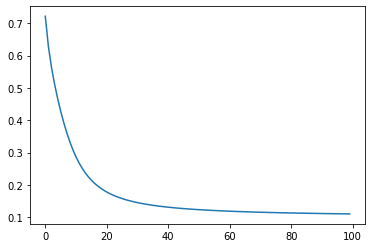

In [70]:
import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.show()

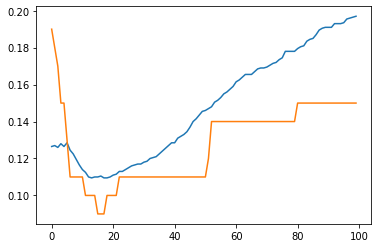

In [71]:
import matplotlib.pyplot as plt
plt.plot(train_scores)
plt.plot(test_scores)
plt.show()

# Linear Unit + Cross Entropy Cost

In [73]:
def fit2(net, criterion, optimizer):
    loss_scores = []
    test_scores = []
    train_scores = []
    for epoch in range(100):  # loop over the dataset multiple times

        # get the inputs
        inputs, labels = t.Tensor(training_data[0]), t.Tensor(training_data[1])
        vector_labels = t.Tensor([vectorized_result(y) for y in training_data[1]])
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        loss_scores.append(loss.item())
        train_scores.append(predict(training_data, net))
        test_scores.append(predict(test_data, net))
    print('Finished Training')
    return loss_scores, train_scores, test_scores

In [74]:
import torch.optim as optim
net2 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr = 1e-1)
loss_scores2, train_scores2, test_scores2 = fit2(net2, criterion, optimizer)

Finished Training


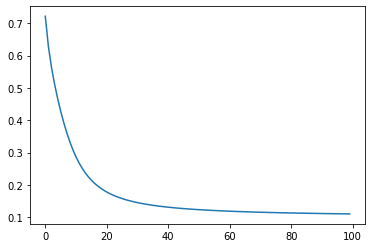

In [75]:
import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.show()

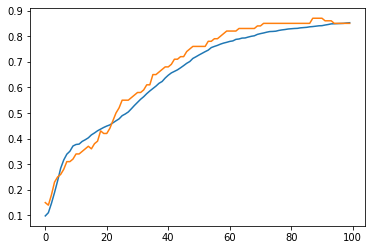

In [76]:
import matplotlib.pyplot as plt
plt.plot(train_scores2)
plt.plot(test_scores2)
plt.show()

# MSE VS Cross Entropy

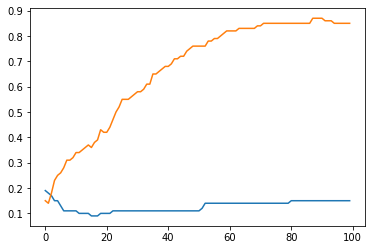

In [77]:
import matplotlib.pyplot as plt
plt.plot(test_scores)
plt.plot(test_scores2)
plt.show()

理论上，cross entropy只在初期优于MSE，但实际上差距很明显